## 04 Joining data with pandas

In this file: merge = join; table = DataFrame

In [1]:
import pandas as pd

taxi_owners = pd.read_pickle('taxi_owners.p')
taxi_veh = pd.read_pickle('taxi_vehicles.p')

print(taxi_owners.head(2))

     rid   vid           owner                 address    zip
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659


In [2]:
print(taxi_veh.head(2))

    vid    make  model  year fuel_type           owner
0  2767  TOYOTA  CAMRY  2013    HYBRID  SEYED M. BADRI
1  1411  TOYOTA   RAV4  2017    HYBRID     DESZY CORP.


## First inner joint

We notice that vid is the only variable common to both DataFrames. So we merge on vid.

In [3]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on = 'vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)


Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


In [4]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
# Note the argument for suffixes is a tuple, not a list
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes = ('_own', '_veh')) 

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)


Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [5]:
# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


## Inner joins and number of rows returned

In [6]:
wards = pd.read_pickle('ward.p')
census = pd.read_pickle('census.p')

In [7]:
print(wards.shape)

(50, 4)


In [8]:
print(census.shape)

(50, 6)


In [9]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on = 'ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

wards_census table shape: (50, 9)


Merge the wards_altered and census tables on the ward column, and notice the difference in returned rows.

In [10]:
print(wards['ward'].head())


0    1
1    2
2    3
3    4
4    5
Name: ward, dtype: object


In [11]:
# Alter the first value in the ward column
wards_altered = wards.replace(to_replace = wards['ward'][0], value = 61)
print(wards_altered['ward'].head())


0    61
1     2
2     3
3     4
4     5
Name: ward, dtype: object


In [12]:
# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards_altered.merge(census, on = 'ward')

# Print the shape of wards_altered_census
print('wards_altered_census table shape:', wards_altered_census.shape)

wards_altered_census table shape: (49, 9)


## One to many relationships

In [13]:
licenses = pd.read_pickle('licenses.p')
biz_owners = pd.read_pickle('business_owners.p')

In [14]:
print(licenses.shape); print(biz_owners.shape)

(10000, 6)
(21352, 4)


In [15]:
# One to many merge
# The left table is the one with a smaller number of rows in terms of the variable we are merging on

# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on = 'account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values(by = 'account', ascending = False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


## Merging multiple DataFrames

In [16]:
cal = pd.read_pickle('cta_ridership.p')
ridership = pd.read_pickle("cta_calendar.p")
stations = pd.read_pickle("stations.p")

In [17]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on = ['year', 'month', 'day'])

In [18]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
            				.merge(stations, on = 'station_id')

In [19]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


## Three table merge (another example)

In [20]:
zip_demo = pd.read_pickle('zip_demo.p')

In [21]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on = 'zip') \
            			.merge(wards, on = 'ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                           income
alderman                         
Ameya Pawar                 66246
Anthony A. Beale            38206
Anthony V. Napolitano       82226
Ariel E. Reyboras           41307
Brendan Reilly             110215
Brian Hopkins               87143
Carlos Ramirez-Rosa         66246
Carrie M. Austin            38206
Chris Taliaferro            55566
Daniel "Danny" Solis        41226
David H. Moore              33304
Deborah Mell                66246
Debra L. Silverstein        50554
Derrick G. Curtis           65770
Edward M. Burke             42335
Emma M. Mitts               36283
George Cardenas             33959
Gilbert Villegas            41307
Gregory I. Mitchell         24941
Harry Osterman              45442
Howard B. Brookins, Jr.     33304
James Cappleman             79565
Jason C. Ervin              41226
Joe Moore                   39163
John S. Arena               70122
Leslie A. Hairston          28024
Margaret Laurino            70122
Marty Quinn   

## One-to-many merge with multiple tables

In [22]:
land_use = pd.read_pickle('land_use.p')

In [23]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(by = ['vacant', 'account', 'pop_2010'], 
                                             ascending= [False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156


## Left join

In [24]:
# syntax 
# left_right = left.merge(right, on = 'variable to merge on', how = 'left')

In [25]:
movies = pd.read_pickle('movies.p')
financials = pd.read_pickle('financials.p')

In [26]:
## Counting missing rows with left join

# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


In [27]:
# An alternative method

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().value_counts()

# Print the number of movies missing financials
print(number_of_missing_fin)

False    3229
True     1574
Name: budget, dtype: int64


In [28]:
## How many rows with a left join?

# Consider the following two lines of code:

# left_table.merge(one_to_one, on='id', how='left').shape
# left_table.merge(one_to_many, on='id', how='left').shape

# The output of a one-to-one merge with a left join will have 
# the same number of rows as the left table. While The output of 
# a one-to-many merge with a left join will have greater than or equal rows than the left table.

## Other joins

## Right join to find unique movies

In [34]:
movie_to_genres = pd.read_pickle('movie_to_genres.p')
scifi_movies = movie_to_genres[movie_to_genres['genre'] == 'Science Fiction']
action_movies = movie_to_genres[genres['genre'] == 'Action']
pop_movies 

In [35]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on = 'id', right_on = 'movie_id')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  


In [36]:
print(movies_and_scifi_only.shape)

(258, 7)


## Popular genres with right join

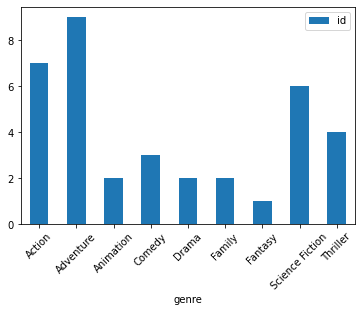

In [41]:
# The top 10 most popular movies
pop_movies = movies.sort_values(by = 'popularity', ascending = False).iloc[0:10]

# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right',left_on = 'movie_id', right_on = 'id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
import matplotlib.pyplot as plt
genre_count.plot(kind='bar', rot = 45)
plt.show()

In [40]:
# # Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
# iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
#                                      on = 'id',
#                                      how = 'outer',
#                                      suffixes = ('_1','_2'))

# Create an index that returns true if name_1 or name_2 are null
# m = ((iron_1_and_2['name_1'].isnull()) | (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
# print(iron_1_and_2[m].head())

## Self join ( = merging a table to itself = merging two copies of the same table)

In [43]:
crews = pd.read_pickle('crews.p')
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [46]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))
crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


In [48]:
# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
     (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


## Merging on indexes